 # StockPlot
 ### Jack Omohundro 2019 
 ***
 

In [1]:
import pandas as pd
import pandas_datareader as pdr

from datetime import datetime as dt
from datetime import timedelta

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from math import isnan


from pandas.plotting import register_matplotlib_converters


In [2]:
import os

cwd = os.getcwd()
import import_ipynb

os.chdir(os.path.expanduser("~") + "/Documents/Modules/")
from OptionChain import getOptChain


os.chdir(cwd)


importing Jupyter notebook from OptionChain.ipynb


 #### Object **StockPlot**
 ***
 

In [3]:
class StockPlot(object):
    
    def __init__(self, tkr, *argv):
        if (tkr==None):
            for arg in argv:
                self._df = arg
        else:
           
            self._df = pd.DataFrame(pdr.get_data_yahoo(tkr),columns=["Close"])
            self._df.index.name=dt.now().strftime("%m/%d/%y")
            self._df.columns = [tkr]
            self._tkr = tkr
        self.title = "Performance"
        
        
    def __add__(self, other):
        self._out = pd.concat([self._df,other._df],axis=1)
        self._out.index.name=dt.now().strftime("%m/%d/%y")
        
        return StockPlot(None,self._out)
    
    
    def __iadd__(self, other):
        self._df = pd.concat([self._df,other._df],axis=1)
        self._df.index.name=dt.now().strftime("%m/%d/%y")
        return self
        
    
    def tpDays(self,days):
        self._df = self._df[-days:]
        
        return self
    
    
    def setTitle(self, t):        
        self.title = t
        
        return self
    
    
    def savefig(self, path):
        plt.savefig(path, dpi=300)
        
    def clear(self):
        self.ax.clear()
        
    def plot(self, title,style="abs", **kwc):
        register_matplotlib_converters()    
        plt.style.use("ggplot")
        self.fig, self.ax = plt.subplots()      
        #self._df.plot(x="Dates", y=list(self._df.columns),title="TEST").set(xlabel="x label", ylabel="y label")

        if style == "rel":
            for x in self._df.columns:
                i = 0
                while isnan(self._df[x][i]):
                    i+=1
                self._df[x] = (self._df[x]/self._df[x][i]-1)*100
                plt.axhline(0,color="grey",linewidth=1.1)
        plt.plot(self._df,linewidth=1, color="#1F3763")
        self.ax.xaxis.set_major_locator(plt.MaxNLocator(7))
        plt.xlabel("Date")
        if style == "rel":
            plt.ylabel("% Change")
        else:
            plt.ylabel("Price")
            
        plt.title(title)
        plt.legend(list(self._df.columns),loc="upper left")
        
        #ticks.append(str(dates[int(len(dates)-1)]))
        plt.xticks(rotation=15)
        plt.subplots_adjust(bottom=0.17)
        
        for key, flag in kwc.items():
            if (key=="path"):
                plt.savefig(flag, dpi=300)
            if (key=="wm"):
                plt.text(.13, .18, flag, fontsize=10, transform=plt.gcf().transFigure)
        
        return self
    
    
    def MA(self, ma):
        self._tmptkrs = pd.DataFrame()
        self._tmpma = pd.DataFrame()
        
        for x in self._df.columns:
            if(x[-2:]!="MA"):
                self._tmptkrs = pd.concat([self._tmptkrs,self._df[x]],axis=1)
                
            else:
                self._tmpma = pd.concat([self._tmpma,self._df[x]],axis=1)
                
        self._toadd = self._tmptkrs.rolling(window=ma).mean()
        self._toadd.columns=[x + str(ma) + "MA" for x in self._toadd.columns]
        self._tmpma = pd.concat([self._toadd],axis=1)
                  
        return StockPlot(None, pd.concat([self._tmpma],axis=1,sort=True))

In [4]:
comment = "!SI ALB --ma=[5,9,20] --title='Test graph' --watermark='STC Investment Club'" 

In [164]:
comment.split(" ")[2]

'--ma=[5,9,20]'

In [160]:
cs = comment.split(" ")
tkr = cs[1]
for i, delim in enumerate(cs) :
    if (delim[0] != '-') & (i > 2):
        cs[i-1-offset]+=" " + cs[i]
        offset+=1
    else: 
        offset=0
cs = [y for i,y in enumerate(cs) if list(map(lambda x: x[0]=='-', cs))[i]==True]
flags = dict()
for flag in cs :
    cdu = flag.split("=")
    flags[cdu[0][2::]]=cdu[1]

DMAs=[]
title=""
wm=""
for flag,val in flags.items():
    if flag == "ma":
        val=val.strip('][').split(',')
        DMAs = [int(x) for x in val]
    elif flag == 'title':
        title = val[1:-1]
    
    elif flag == 'wm':
        wm = val[1:-1]

In [161]:
tkr, flags

('ALB',
 {'ma': '[5,9,20]',
  'title': "'Test graph'",
  'watermark': "'STC Investment Club'"})

In [162]:
DMAs

[5, 9, 20]

NameError: name 'pct' is not defined

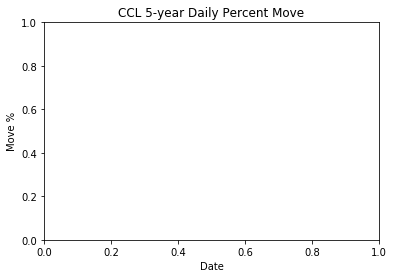

In [104]:
import statistics
fig, ax1 = plt.subplots()
ax1.set_ylabel("Move %")
plt.xlabel("Date")

ax1.set_title("CCL 5-year Daily Percent Move")


ax1.plot(pct.index, [(pct["Close"][i]/pct["Close"][i-1] - 1) *100for i in range(1, len(pct["Close"]))] + [0], linewidth=.4)
plt.text(.14, .13, "STC Investment Club 2020.  As of 3/1/2020.", fontsize=10, transform=plt.gcf().transFigure)

plt.savefig("CCLMove.png",dpi=300)
'''
avgVol = statistics.mean(pct["Volume"])
ax2 = ax1.twinx()
ax2.set_ylabel("Volume (% over average)")
ax2.set_ylim(-10,2000)
ax2.xaxis.set_major_locator(plt.MaxNLocator(6))
plt.text(.13, .84, "STC Investment Club 2020.  As of 3/1/2020.", fontsize=10, transform=plt.gcf().transFigure)
plt.style.use("ggplot")
ax2.plot(pct.index,[(x/avgVol-1)*100 for x in pct["Volume"]],color="blue",linewidth=1)
plt.savefig('CCLMoveST.png',dpi=300,bbox_inches="tight")
'''

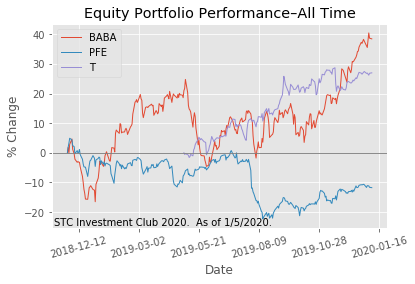

In [65]:
'''equities = StockPlot("BABA").tpDays(278) + StockPlot("PFE").tpDays(278) + StockPlot("T").tpDays(173)
equities.plot("Equity Portfolio Performance–All Time",style='rel',wm="STC Investment Club 2020.  As of 1/5/2020.")

equities.savefig("EquityPerformance.png")
'''

In [81]:
'''#FY2019
equities = StockPlot("BABA").tpDays(260) + StockPlot("PFE").tpDays(260) + StockPlot("T").tpDays(173)
etfs = StockPlot("VUG").tpDays(168) + StockPlot("VONV").tpDays(220) + StockPlot("IJS").tpDays(168) + StockPlot("EEM").tpDays(164)

total = equities + etfs
'''

In [89]:
'''weights = {"BABA":.1886,
          "PFE":.1240,
          "T":.1414,
          "VONV":.1212,
          "IJS":.0929,
          "EEM":.1171,
           "VUG":.1063
          }
def test(x):
    if isnan(x):
        return 0

    
total._df.applymap(test)
for x in total._df.columns:
    total._df[x]*=weights[x]

'''

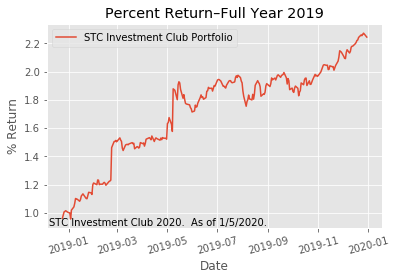

In [88]:
'''
fig,ax = plt.subplots()#ax.xaxis.set_major_locator(plt.MaxNLocator(4))
plt.xticks(rotation=15)
plt.title("Percent Return–Full Year 2019")
plt.xlabel("Date")
plt.ylabel("% Return")
plt.text(.13, .18, "STC Investment Club 2020.  As of 1/5/2020.", fontsize=10, transform=plt.gcf().transFigure)
plt.subplots_adjust(bottom=0.17)
plt.plot(total._df[:-4].sum(axis=1), label="STC Investment Club Portfolio")
plt.legend()

plt.savefig("FY2019.png",dpi=300)
'''

In [51]:
plot = StockPlot("CCL")
plot.tpDays(63)

In [28]:
plot += plot.MA(7) + plot.MA(10) + plot.MA(14)
plot.plot("CCL–90day Performance",ma=[7,10,14],style="abs", wm="STC Investment Club 2020")
plot.savefig("/Users/jackomohundro/Desktop/CCL90.png")

NameError: name 'plot' is not defined

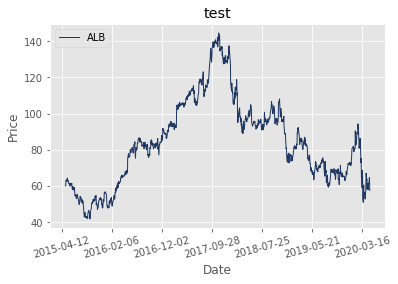

In [21]:
a = StockPlot("ALB").plot("test")

In [44]:
ccl = StockPlot("CCL")


In [19]:
ccl.tpDays(252).plot("CCL–1yr Performance",wm="STC Investment Club 2020.  As of 3/12/2020.")
ccl.savefig("cclperf.png")

NameError: name 'ccl' is not defined

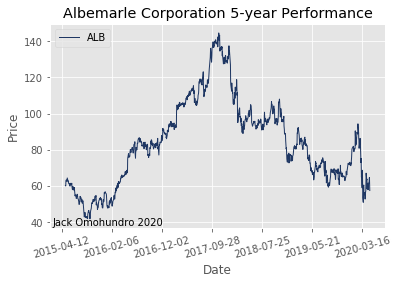

In [20]:
StockPlot("ALB").plot('Albemarle Corporation 5-year Performance',wm='Jack Omohundro 2020')
plt.savefig("alb-out.png",dpi=300,bbox_inches='tight')